In [ ]:
!pip install psycopg2

In [ ]:
import numpy as np
import pandas as pd
import psycopg2 as ps
import matplotlib.pyplot as plt

In [3]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from sklearn.impute import SimpleImputer
from numpy import isnan
from pandas import DataFrame
from pandas import concat
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [83]:
link = 'https://drive.google.com/file/d/12SFrvr4XQo6NFqd3v8waP0NYbKyyKEnm/view?usp=sharing' 
# to get the id part of the file 
id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('annual_aqi_by_county_2020.csv')   
  
df = pd.read_csv('annual_aqi_by_county_2020.csv') 
print(df)


InvalidConfigError: ignored

In [ ]:
df.describe() #describe the data 
df.head()


,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,Alabama,Baldwin,2020,11,11,0,0,0,0,0,48,39,20,0,0,0,0,11,0
1,Alabama,Clay,2020,5,5,0,0,0,0,0,31,31,15,0,0,0,0,5,0
2,Alabama,DeKalb,2020,59,59,0,0,0,0,0,45,40,32,0,0,58,0,1,0
3,Alabama,Etowah,2020,8,8,0,0,0,0,0,40,40,28,0,0,0,0,8,0
4,Alabama,Jefferson,2020,32,26,6,0,0,0,0,63,54,35,1,5,9,0,15,2


Data collected is during the year of 2020 upto and including April 22, considering COVID spread at different times for each county then number of days with AQI reported would differ. AQI reports show there were no hazardeous days. On average, Ozone and PM2.5 were the main pollutants resposible for the high AQI value. 

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '') #rename our columns
print(df.columns.values) # check names 
len(df[df.days_with_aqi >= 60]) # 403 out of 626
#df['Days with AQI'].value_counts()[122]


['state' 'county' 'year' 'days_with_aqi' 'good_days' 'moderate_days'
 'unhealthy_for_sensitive_groups_days' 'unhealthy_days'
 'very_unhealthy_days' 'hazardous_days' 'max_aqi' '90th_percentile_aqi'
 'median_aqi' 'days_co' 'days_no2' 'days_ozone' 'days_so2' 'days_pm2.5'
 'days_pm10']


403

In [ ]:
df.drop(['days_no2', 'days_co','days_ozone','days_so2'], axis = 1) #drop unecessary columns 

In [ ]:
len(df[df.days_with_aqi <= 10]) # 19 out of 626


19

In [ ]:
len(df[df.days_with_aqi > 100]) 

39

# Cases and deaths by country time csv

In [4]:
link2 = 'https://drive.google.com/file/d/1Nvaua7CVAiyCfuNFjLIzQJRRKIhXeuql/view?usp=sharing' 
# to get the id part of the file 
id = link2.split("/")[-2] 
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('2_cases_and_deaths_by_county_timeseries.csv')   
  
df2 = pd.read_csv('2_cases_and_deaths_by_county_timeseries.csv') 
print(df2)


             uid  ... new_deaths_7_day_rolling_avg
0       63072001  ...                          NaN
1       63072001  ...                          NaN
2       63072001  ...                          NaN
3       63072001  ...                          NaN
4       63072001  ...                          NaN
...          ...  ...                          ...
840667  84099999  ...                          0.0
840668  84099999  ...                          0.0
840669  84099999  ...                          0.0
840670  84099999  ...                          0.0
840671  84099999  ...                          0.0

[840672 rows x 17 columns]


In [ ]:
#from sklearn.model_selection import train_test_split
#X, y = data[:, :-1], data[:, -1]


In [5]:
col_names = df2.columns
print(col_names)
df2.head()
df2.tail()


Index(['uid', 'location_type', 'fips_code', 'location_name', 'state', 'date',
       'total_population', 'cumulative_cases', 'cumulative_cases_per_100_000',
       'cumulative_deaths', 'cumulative_deaths_per_100_000', 'new_cases',
       'new_deaths', 'new_cases_per_100_000', 'new_deaths_per_100_000',
       'new_cases_7_day_rolling_avg', 'new_deaths_7_day_rolling_avg'],
      dtype='object')


,uid,location_type,fips_code,location_name,state,date,total_population,cumulative_cases,cumulative_cases_per_100_000,cumulative_deaths,cumulative_deaths_per_100_000,new_cases,new_deaths,new_cases_per_100_000,new_deaths_per_100_000,new_cases_7_day_rolling_avg,new_deaths_7_day_rolling_avg
840667,84099999,special_exception,99999.0,NaN,Grand Princess,2020-09-25,NaN,103,NaN,3,NaN,0.0,0.0,NaN,NaN,0.0,0.0
840668,84099999,special_exception,99999.0,NaN,Grand Princess,2020-09-26,NaN,103,NaN,3,NaN,0.0,0.0,NaN,NaN,0.0,0.0
840669,84099999,special_exception,99999.0,NaN,Grand Princess,2020-09-27,NaN,103,NaN,3,NaN,0.0,0.0,NaN,NaN,0.0,0.0
840670,84099999,special_exception,99999.0,NaN,Grand Princess,2020-09-28,NaN,103,NaN,3,NaN,0.0,0.0,NaN,NaN,0.0,0.0
840671,84099999,special_exception,99999.0,NaN,Grand Princess,2020-09-29,NaN,103,NaN,3,NaN,0.0,0.0,NaN,NaN,0.0,0.0


In [6]:
df2.describe()
#df.boxplot(by ='day', column =['total_bill'], grid = False) 


,uid,fips_code,total_population,cumulative_cases,cumulative_cases_per_100_000,cumulative_deaths,cumulative_deaths_per_100_000,new_cases,new_deaths,new_cases_per_100_000,new_deaths_per_100_000,new_cases_7_day_rolling_avg,new_deaths_7_day_rolling_avg
count,8.406720e+05,838152.000000,8.114400e+05,840672.000000,811440.000000,840672.000000,811440.000000,837336.000000,837336.000000,808220.000000,808220.000000,821539.000000,823553.000000
mean,8.352961e+07,33101.364101,1.013323e+05,713.586791,508.916904,27.011387,13.403323,8.582454,0.245919,7.511959,0.165771,8.752170,0.267732
std,3.206731e+06,18612.177489,3.260459e+05,4560.467822,939.007646,214.845071,31.898203,63.175673,6.109500,30.082098,1.386914,53.886842,2.571467
min,6.307200e+07,1001.000000,7.500000e+01,0.000000,0.000000,0.000000,0.000000,-13347.000000,-3962.000000,-3298.720000,-165.320000,0.000000,0.000000
25%,8.401811e+07,19085.000000,1.121425e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.402921e+07,31018.000000,2.595050e+04,20.000000,102.085000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.430000,0.000000
75%,8.404612e+07,47133.000000,6.655225e+04,201.000000,606.122500,4.000000,11.370000,3.000000,0.000000,7.260000,0.000000,3.430000,0.000000
max,8.410000e+07,99999.000000,1.009805e+07,269284.000000,17434.450000,7329.000000,492.090000,14129.000000,1553.000000,9370.100000,172.000000,3283.570000,244.570000


In [ ]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", df2.isnull().sum()) 

In [7]:
len(df2[df2.cumulative_cases < 10]) 
df2.date
len(df2[df2.location_type == 'special_exception']) 


3024

In [8]:
df2[df2['location_name'].isnull()]
indexNames = df2[ df2['location_type'] != 'county' ].index
#print(indexNames)
# Delete these row indexes from dataFrame
df2.drop(indexNames , inplace=True)
indexNames = df2[ df2['location_type'] != 'county' ].index
#print(indexNames)
# Delete these row indexes from dataFrame
df2.drop(indexNames , inplace=True)

# TEST IF DROPPED
len(df2[df2.location_type == 'special_exception']) 
                    

0

Cumilative cases below 10 should be gone... 

Data collected for each uid is cumilative daily stats between 2020-01-22 and 2020-9-29 (about 9 months).




In [9]:
df2[df2['new_cases'].isnull()]
len(df2[ df2['location_type'] != 'county' ]) #25704
df2[ df2['location_type'] != 'county' ]
#df2[df2['new_cases_per_100_000'].isnull()]
df2['new_cases_per_100_000'] = df2['new_cases_per_100_000'].fillna(0)
df2['new_cases'] = df2['new_cases'].fillna(0)
df2['new_deaths'] = df2['new_deaths'].fillna(0)
df2['new_deaths_per_100_000'] = df2['new_deaths_per_100_000'].fillna(0)
df2['new_cases_7_day_rolling_avg'] = df2['new_cases_7_day_rolling_avg'].fillna(0)
df2['new_deaths_7_day_rolling_avg'] = df2['new_deaths_7_day_rolling_avg'].fillna(0)

 #df2[df2['total_population'].isnull()]

In [11]:
indexNames = df2[ df2['total_population'].isnull() ].index
print(indexNames)
df2[df2['total_population'].isnull() ]  

Int64Index([19656, 19657, 19658, 19659, 19660, 19661, 19662, 19663, 19664,
            19665,
            ...
            20150, 20151, 20152, 20153, 20154, 20155, 20156, 20157, 20158,
            20159],
           dtype='int64', length=504)


,uid,location_type,fips_code,location_name,state,date,total_population,cumulative_cases,cumulative_cases_per_100_000,cumulative_deaths,cumulative_deaths_per_100_000,new_cases,new_deaths,new_cases_per_100_000,new_deaths_per_100_000,new_cases_7_day_rolling_avg,new_deaths_7_day_rolling_avg
19656,63072888,county,72888.0,Out of PR,Puerto Rico,2020-01-22,NaN,0,NaN,0,NaN,0.0,0.0,0.0,0.0,0.0,0.00
19657,63072888,county,72888.0,Out of PR,Puerto Rico,2020-01-23,NaN,0,NaN,0,NaN,0.0,0.0,0.0,0.0,0.0,0.00
19658,63072888,county,72888.0,Out of PR,Puerto Rico,2020-01-24,NaN,0,NaN,0,NaN,0.0,0.0,0.0,0.0,0.0,0.00
19659,63072888,county,72888.0,Out of PR,Puerto Rico,2020-01-25,NaN,0,NaN,0,NaN,0.0,0.0,0.0,0.0,0.0,0.00
19660,63072888,county,72888.0,Out of PR,Puerto Rico,2020-01-26,NaN,0,NaN,0,NaN,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20155,63072999,county,72999.0,Unassigned,Puerto Rico,2020-09-25,NaN,535,NaN,635,NaN,-7.0,8.0,0.0,0.0,0.0,5.14
20156,63072999,county,72999.0,Unassigned,Puerto Rico,2020-09-26,NaN,517,NaN,642,NaN,-18.0,7.0,0.0,0.0,0.0,5.29
20157,63072999,county,72999.0,Unassigned,Puerto Rico,2020-09-27,NaN,521,NaN,644,NaN,4.0,2.0,0.0,0.0,0.0,5.14
20158,63072999,county,72999.0,Unassigned,Puerto Rico,2020-09-28,NaN,553,NaN,648,NaN,32.0,4.0,0.0,0.0,0.0,5.57


the rest missing values are all the same rows, 

In [13]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", df2.isnull().sum()) 

 
Count total NaN at each column in a DataFrame : 

 uid                                0
location_type                      0
fips_code                          0
location_name                      0
state                              0
date                               0
total_population                 504
cumulative_cases                   0
cumulative_cases_per_100_000     504
cumulative_deaths                  0
cumulative_deaths_per_100_000    504
new_cases                          0
new_deaths                         0
new_cases_per_100_000              0
new_deaths_per_100_000             0
new_cases_7_day_rolling_avg        0
new_deaths_7_day_rolling_avg       0
dtype: int64


In [14]:
df2.state.unique().tolist()
pi = df2[ (df2['state'] == 'Puerto Rico') | (df2['state'] == 'District of Columbia')].index
len(pi)
df2.drop(pi, inplace=True)
#df2[ df2['state'] == 'Puerto Rico' ]


In [15]:
len(df2.location_name.unique().tolist())
df2["state_county"] = df2["state"].astype(str) + " " +df2["location_name"].astype(str)
print(df2["state_county"].head())
print(len(df2["state_county"].unique()))
print(len(df2["location_name"] ))
print(len(df2["location_type"] ))
df2.drop([ 'state', 'location_name'], axis = 1,inplace=True)



20160    Alabama Autauga
20161    Alabama Autauga
20162    Alabama Autauga
20163    Alabama Autauga
20164    Alabama Autauga
Name: state_county, dtype: object
3141
791532
791532


In [16]:
print(df2.date.head())
print(df2.date.min())
print(df2.date.max())
df2

20160    2020-01-22
20161    2020-01-23
20162    2020-01-24
20163    2020-01-25
20164    2020-01-26
Name: date, dtype: object
2020-01-22
2020-09-29


,uid,location_type,fips_code,date,total_population,cumulative_cases,cumulative_cases_per_100_000,cumulative_deaths,cumulative_deaths_per_100_000,new_cases,new_deaths,new_cases_per_100_000,new_deaths_per_100_000,new_cases_7_day_rolling_avg,new_deaths_7_day_rolling_avg,state_county
20160,84001001,county,1001.0,2020-01-22,55200.0,0,0.00,0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,Alabama Autauga
20161,84001001,county,1001.0,2020-01-23,55200.0,0,0.00,0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,Alabama Autauga
20162,84001001,county,1001.0,2020-01-24,55200.0,0,0.00,0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,Alabama Autauga
20163,84001001,county,1001.0,2020-01-25,55200.0,0,0.00,0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,Alabama Autauga
20164,84001001,county,1001.0,2020-01-26,55200.0,0,0.00,0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,Alabama Autauga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811939,84056045,county,56045.0,2020-09-25,7100.0,35,492.96,0,0.0,8.0,0.0,112.68,0.0,2.17,0.0,Wyoming Weston
811940,84056045,county,56045.0,2020-09-26,7100.0,36,507.04,0,0.0,1.0,0.0,14.08,0.0,2.33,0.0,Wyoming Weston
811941,84056045,county,56045.0,2020-09-27,7100.0,36,507.04,0,0.0,0.0,0.0,0.00,0.0,2.33,0.0,Wyoming Weston
811942,84056045,county,56045.0,2020-09-28,7100.0,36,507.04,0,0.0,0.0,0.0,0.00,0.0,2.33,0.0,Wyoming Weston


In [17]:
link3 = 'https://drive.google.com/file/d/1_RnX-COmRN4l6pTRRpB_w9MOa0g4OHbY/view?usp=sharing'        
id = link3.split("/")[-2]               
downloaded = drive.CreateFile({'id':id})    
downloaded.GetContentFile('PM2.5 (2).csv')   
pm2_5 = pd.read_csv('PM2.5 (2).csv')   
print(" \nCount total NaN at each column in a DataFrame : \n\n", pm2_5.isnull().sum()) 
pm2_5.head()                 
print(pm2_5.describe())       

 
Count total NaN at each column in a DataFrame : 

 State Code                 0
County Code                0
Site Num                   0
Parameter Code             0
POC                        0
Latitude                   0
Longitude                  0
Datum                      0
Parameter Name             0
Sample Duration            0
Pollutant Standard     19707
Date Local                 0
Units of Measure           0
Event Type                 0
Observation Count          0
Observation Percent        0
Arithmetic Mean            0
1st Max Value              0
1st Max Hour               0
AQI                     9926
Method Code             9721
Method Name                0
Local Site Name          357
Address                    0
State Name                 0
County Name                0
City Name                  0
CBSA Name               2885
Date of Last Change        0
dtype: int64
         State Code   County Code  ...          AQI  Method Code
count  19707.000000  19707.0

In [18]:
pm2_5.columns = pm2_5.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '') #rename our columns
print(pm2_5.columns.values) # check names 
df2.head()
print(len(pm2_5.county_name.unique()))

['state_code' 'county_code' 'site_num' 'parameter_code' 'poc' 'latitude'
 'longitude' 'datum' 'parameter_name' 'sample_duration'
 'pollutant_standard' 'date_local' 'units_of_measure' 'event_type'
 'observation_count' 'observation_percent' 'arithmetic_mean'
 '1st_max_value' '1st_max_hour' 'aqi' 'method_code' 'method_name'
 'local_site_name' 'address' 'state_name' 'county_name' 'city_name'
 'cbsa_name' 'date_of_last_change']
126


In [19]:
print(pm2_5.date_local.min())
print(pm2_5.date_local.max())
pm2_5.rename(columns={"date_local": "date"}, inplace = True)


2020-01-01
2020-04-30


In [20]:
print(pm2_5.columns.values) # check names 


['state_code' 'county_code' 'site_num' 'parameter_code' 'poc' 'latitude'
 'longitude' 'datum' 'parameter_name' 'sample_duration'
 'pollutant_standard' 'date' 'units_of_measure' 'event_type'
 'observation_count' 'observation_percent' 'arithmetic_mean'
 '1st_max_value' '1st_max_hour' 'aqi' 'method_code' 'method_name'
 'local_site_name' 'address' 'state_name' 'county_name' 'city_name'
 'cbsa_name' 'date_of_last_change']


In [21]:
pm2_5.drop([ 'method_code', 'method_name','pollutant_standard','address'], axis = 1,inplace=True)


In [22]:
print(pm2_5.county_name.describe())
pm2_5.state_code.unique
print(" \nCount total NaN at each column in a DataFrame : \n\n", pm2_5.isnull().sum()) 


count     19707
unique      126
top       Duval
freq        544
Name: county_name, dtype: object
 
Count total NaN at each column in a DataFrame : 

 state_code                0
county_code               0
site_num                  0
parameter_code            0
poc                       0
latitude                  0
longitude                 0
datum                     0
parameter_name            0
sample_duration           0
date                      0
units_of_measure          0
event_type                0
observation_count         0
observation_percent       0
arithmetic_mean           0
1st_max_value             0
1st_max_hour              0
aqi                    9926
local_site_name         357
state_name                0
county_name               0
city_name                 0
cbsa_name              2885
date_of_last_change       0
dtype: int64


In [ ]:
pm2_5["state_county"] = pm2_5["state_name"].astype(str) + " "+ pm2_5["county_name"].astype(str)
print(pm2_5["state_county"])
pm2_5.drop([ 'state_name', 'county_name'], axis = 1,inplace=True)


In [27]:
print(len(pm2_5.state_county.unique()))


138


In [24]:
c_pm = pm2_5
print(c_pm)


       state_code  county_code  ...  date_of_last_change       state_county
0               1           73  ...           2020-05-08  Alabama Jefferson
1               1           73  ...           2020-05-08  Alabama Jefferson
2               1           73  ...           2020-05-08  Alabama Jefferson
3               1           73  ...           2020-05-08  Alabama Jefferson
4               1           73  ...           2020-05-08  Alabama Jefferson
...           ...          ...  ...                  ...                ...
19702          53           77  ...           2020-04-30  Washington Yakima
19703          53           77  ...           2020-04-30  Washington Yakima
19704          53           77  ...           2020-04-30  Washington Yakima
19705          53           77  ...           2020-04-30  Washington Yakima
19706          53           77  ...           2020-04-30  Washington Yakima

[19707 rows x 24 columns]


In [1]:
dataset = pd.merge(df2,c_pm, on= ['state_county','date'])
dataset.describe()
dataset

NameError: ignored

In [26]:
print(len(dataset.state_county.unique()))

118


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error 
from sklearn.compose import ColumnTransformer
lof = LocalOutlierFactor()

Y = NC.iloc[:,2:11]
lof = LocalOutlierFactor()
yhat = lof.fit_predict(Y)
print(yhat)
# select all rows that are not outliers :14 outliers
outliers = yhat == -1
mask = yhat != -1
Y.iloc[outliers, :]
indexes = Y.iloc[outliers, :].index
print(indexes)


In [215]:
dataset.describe()
dataset.drop(["new_cases_per_100_000"	,"new_deaths_per_100_000",	"new_cases_7_day_rolling_avg",	"new_deaths_7_day_rolling_avg", ], axis = 1,inplace=True)
 

In [216]:
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.describe()
# shuffle the data
 

,uid,location_type,fips_code,date,total_population,cumulative_cases,cumulative_cases_per_100_000,cumulative_deaths,cumulative_deaths_per_100_000,new_cases,new_deaths,state_county,site_num,parameter_code,poc,latitude,longitude,datum,parameter_name,sample_duration,units_of_measure,event_type,observation_count,observation_percent,arithmetic_mean,1st_max_value,1st_max_hour,aqi,local_site_name,city_name,cbsa_name,date_of_last_change
0,84053015,county,53015.0,2020-01-30,105112.0,0,0.00,0,0.0,0.0,0.0,Washington Cowlitz,15,88502,4,46.139444,-122.961944,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,Micrograms/cubic meter (LC),None,1,100.0,2.900000,2.9,23,12.0,LONGVIEW - 30TH AVE,Longview,"Longview, WA",2020-04-30
1,84019177,county,19177.0,2020-02-26,7223.0,0,0.00,0,0.0,0.0,0.0,Iowa Van Buren,6,88502,3,40.695078,-92.006318,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,Micrograms/cubic meter (LC),None,1,100.0,3.500000,3.5,23,15.0,LAKE SUGEMA STATE PARK II,Not in a city,NaN,2020-05-12
2,84012031,county,12031.0,2020-03-13,924229.0,1,0.11,0,0.0,1.0,0.0,Florida Duval,32,88502,1,30.356339,-81.635396,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,Micrograms/cubic meter (LC),None,1,100.0,11.400000,11.4,23,48.0,Kooker Park,Jacksonville,"Jacksonville, FL",2020-05-13
3,84005119,county,5119.0,2020-02-08,393463.0,0,0.00,0,0.0,0.0,0.0,Arkansas Pulaski,1008,88502,3,34.681343,-92.328697,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,Micrograms/cubic meter (LC),None,1,100.0,7.500000,7.5,23,31.0,DOYLE SPRINGS ROAD,Little Rock,"Little Rock-North Little Rock-Conway, AR",2020-04-01
4,84022019,county,22019.0,2020-02-11,200182.0,0,0.00,0,0.0,0.0,0.0,Louisiana Calcasieu,8,88502,3,30.262604,-93.285084,NAD83,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,Micrograms/cubic meter (LC),None,1,100.0,4.900000,4.9,23,20.0,Westlake,Westlake (RR name West Lake),"Lake Charles, LA",2020-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13565,84022057,county,22057.0,2020-02-09,98214.0,0,0.00,0,0.0,0.0,0.0,Louisiana Lafourche,4,88502,3,29.764098,-90.765275,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,Micrograms/cubic meter (LC),None,1,100.0,6.400000,6.4,23,27.0,Thibodaux,Thibodaux,"Houma-Thibodaux, LA",2020-04-30
13566,84039085,county,39085.0,2020-03-20,230052.0,3,1.30,0,0.0,1.0,0.0,Ohio Lake,7,88502,3,41.726811,-81.242156,NAD83,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,Micrograms/cubic meter (LC),None,24,100.0,4.795833,7.3,0,NaN,Painesville,Painesville,"Cleveland-Elyria, OH",2020-05-18
13567,84006063,county,6063.0,2020-04-30,18699.0,4,21.39,0,0.0,0.0,0.0,California Plumas,1006,88502,4,39.939567,-120.944376,NAD83,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,Micrograms/cubic meter (LC),None,1,100.0,2.700000,2.7,23,11.0,Quincy-N Church Street,Quincy,NaN,2020-05-06
13568,84012031,county,12031.0,2020-03-01,924229.0,0,0.00,0,0.0,0.0,0.0,Florida Duval,32,88502,1,30.356339,-81.635396,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,Micrograms/cubic meter (LC),None,1,100.0,16.900000,16.9,23,61.0,Kooker Park,Jacksonville,"Jacksonville, FL",2020-05-13


In [217]:
dataset["date"] = pd.to_datetime(dataset["date"])
dataset = dataset.set_index("date")
 

In [242]:
dataset['year'] = dataset.index.year
dataset['month'] = dataset.index.month
dataset['weekday'] = dataset.index.dayofweek
dataset['dayofyear'] = dataset.index.dayofyear
dataset['dayofmonth'] = dataset.index.daysinmonth

dataset

,uid,location_type,fips_code,total_population,cumulative_cases,cumulative_cases_per_100_000,cumulative_deaths,cumulative_deaths_per_100_000,new_cases,new_deaths,state_county,site_num,parameter_code,poc,latitude,longitude,datum,parameter_name,sample_duration,units_of_measure,event_type,observation_count,observation_percent,arithmetic_mean,1st_max_value,1st_max_hour,aqi,local_site_name,city_name,cbsa_name,date_of_last_change,year,month,weekday,daily,dayofyear,dayofmonth
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-30,84053015,county,53015.0,105112.0,0,0.00,0,0.0,0.0,0.0,Washington Cowlitz,15,88502,4,46.139444,-122.961944,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,Micrograms/cubic meter (LC),None,1,100.0,2.900000,2.9,23,12.0,LONGVIEW - 30TH AVE,Longview,"Longview, WA",2020-04-30,2020,1,3,30,30,31
2020-02-26,84019177,county,19177.0,7223.0,0,0.00,0,0.0,0.0,0.0,Iowa Van Buren,6,88502,3,40.695078,-92.006318,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,Micrograms/cubic meter (LC),None,1,100.0,3.500000,3.5,23,15.0,LAKE SUGEMA STATE PARK II,Not in a city,NaN,2020-05-12,2020,2,2,57,57,29
2020-03-13,84012031,county,12031.0,924229.0,1,0.11,0,0.0,1.0,0.0,Florida Duval,32,88502,1,30.356339,-81.635396,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,Micrograms/cubic meter (LC),None,1,100.0,11.400000,11.4,23,48.0,Kooker Park,Jacksonville,"Jacksonville, FL",2020-05-13,2020,3,4,73,73,31
2020-02-08,84005119,county,5119.0,393463.0,0,0.00,0,0.0,0.0,0.0,Arkansas Pulaski,1008,88502,3,34.681343,-92.328697,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,Micrograms/cubic meter (LC),None,1,100.0,7.500000,7.5,23,31.0,DOYLE SPRINGS ROAD,Little Rock,"Little Rock-North Little Rock-Conway, AR",2020-04-01,2020,2,5,39,39,29
2020-02-11,84022019,county,22019.0,200182.0,0,0.00,0,0.0,0.0,0.0,Louisiana Calcasieu,8,88502,3,30.262604,-93.285084,NAD83,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,Micrograms/cubic meter (LC),None,1,100.0,4.900000,4.9,23,20.0,Westlake,Westlake (RR name West Lake),"Lake Charles, LA",2020-04-30,2020,2,1,42,42,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-09,84022057,county,22057.0,98214.0,0,0.00,0,0.0,0.0,0.0,Louisiana Lafourche,4,88502,3,29.764098,-90.765275,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,Micrograms/cubic meter (LC),None,1,100.0,6.400000,6.4,23,27.0,Thibodaux,Thibodaux,"Houma-Thibodaux, LA",2020-04-30,2020,2,6,40,40,29
2020-03-20,84039085,county,39085.0,230052.0,3,1.30,0,0.0,1.0,0.0,Ohio Lake,7,88502,3,41.726811,-81.242156,NAD83,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,Micrograms/cubic meter (LC),None,24,100.0,4.795833,7.3,0,NaN,Painesville,Painesville,"Cleveland-Elyria, OH",2020-05-18,2020,3,4,80,80,31
2020-04-30,84006063,county,6063.0,18699.0,4,21.39,0,0.0,0.0,0.0,California Plumas,1006,88502,4,39.939567,-120.944376,NAD83,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,Micrograms/cubic meter (LC),None,1,100.0,2.700000,2.7,23,11.0,Quincy-N Church Street,Quincy,NaN,2020-05-06,2020,4,3,121,121,30


Int64Index([1, 2, 3, 4], dtype='int64', name='month')


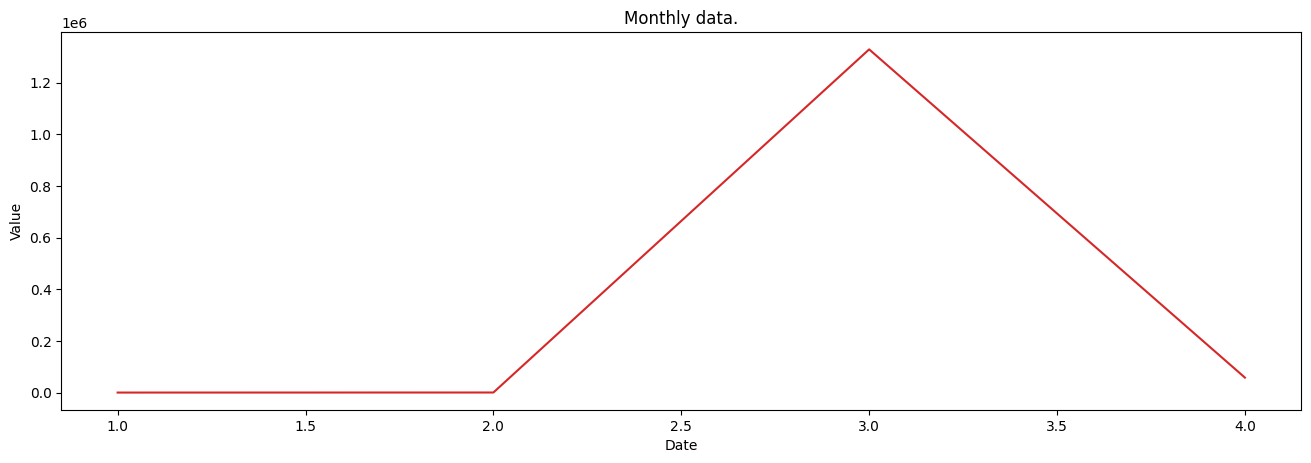

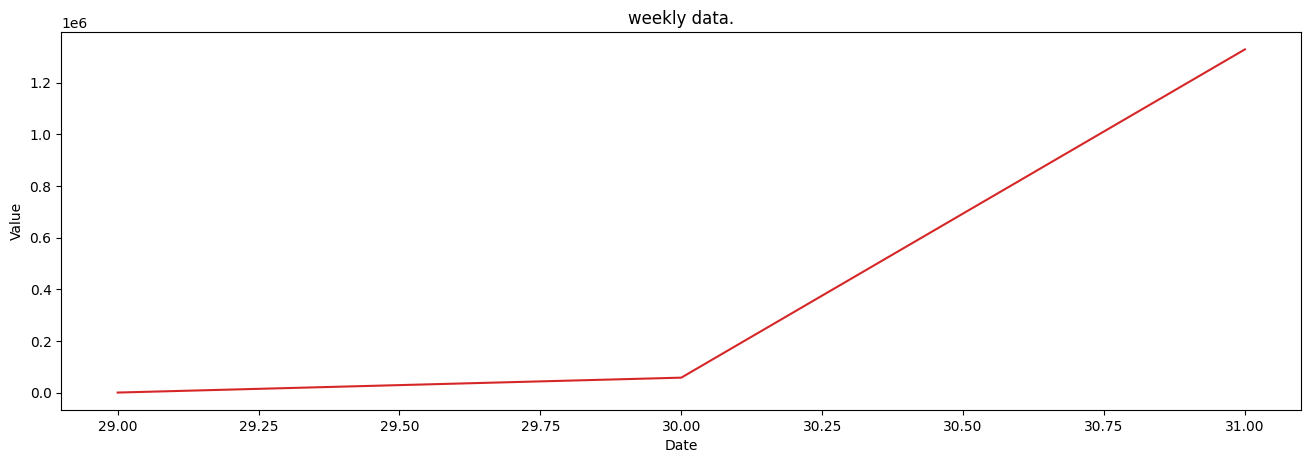

In [243]:
import matplotlib.pyplot as plt
from pandas import DataFrame

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

result = DataFrame(dataset.groupby(dataset.month)['cumulative_cases'].sum())
print(result.index)

plot_df(result, x=result.index, y= result.cumulative_cases, title='Monthly data.')    
## outliers loll

result2 = DataFrame(dataset.groupby(dataset.dayofmonth)['cumulative_cases'].sum())
 
plot_df(result2, x=result2.index, y= result2.cumulative_cases, title='day of moth')

In [175]:
data = dataset.values


In [205]:
#ix = [i for i in range(data.shape[1]) if i != 4]
#X, y = data[:,ix], data[:, 4]
y = dataset.cumulative_cases
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.33, random_state=1)
 

In [202]:
len(X_train.aqi)

9091

In [206]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error 
from sklearn.compose import ColumnTransformer
lof = LocalOutlierFactor()
transformer = ColumnTransformer(transformers=[('num', SimpleImputer(strategy='mean'), [-5])], remainder='passthrough')
transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

9091

In [ ]:
 
counties = pd.read_csv('/content/totalCounties')
counties.head() 
type(counties) 
counties.describe()  
list_c = counties.x.tolist()  
df2.head()
counter= 0

for y in df2.location_name.unique().tolist():
  if y not in counties.x.tolist():
    yindex = df2[ df2['location_name'] == y ].index
    df2.drop(yindex,inplace=True)

